# Initial software product/solution demonstration


# ML Capstone Notebook: Entrepreneurial Skills Simulation

This notebook demonstrates the end-to-end process for building, evaluating, and preparing to deploy a machine learning model for predicting entrepreneurial skills in secondary students.

In [ ]:
# import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate mock data
n_samples = 200

data = pd.DataFrame({
    'age': np.random.randint(15, 20, n_samples),
    'prior_business_exposure': np.random.binomial(1, 0.3, n_samples),
    'risk_taking': np.random.rand(n_samples),
    'decision_speed': np.random.rand(n_samples),
    'creativity_score': np.random.rand(n_samples),
    'leadership_experience': np.random.binomial(1, 0.4, n_samples)
})


In [3]:
# Simulate target with some logic
prob = (
    0.2 * data['prior_business_exposure'] +
    0.2 * data['risk_taking'] +
    0.2 * data['decision_speed'] +
    0.2 * data['creativity_score'] +
    0.2 * data['leadership_experience']
)
data['entrepreneurial_skill'] = (prob + 0.1 * np.random.randn(n_samples) > 0.7).astype(int)

data.head()


,age,prior_business_exposure,risk_taking,decision_speed,creativity_score,leadership_experience,entrepreneurial_skill
0,18,1,0.128500,0.903151,0.706980,1,0
1,19,0,0.811204,0.617264,0.778572,0,0
2,17,1,0.820639,0.980463,0.143128,1,1
3,19,1,0.625940,0.608088,0.204545,0,0
4,19,0,0.820427,0.636644,0.714064,1,0


**Visualize Feature Distributions** : Plot the distributions of each feature to understand the data.

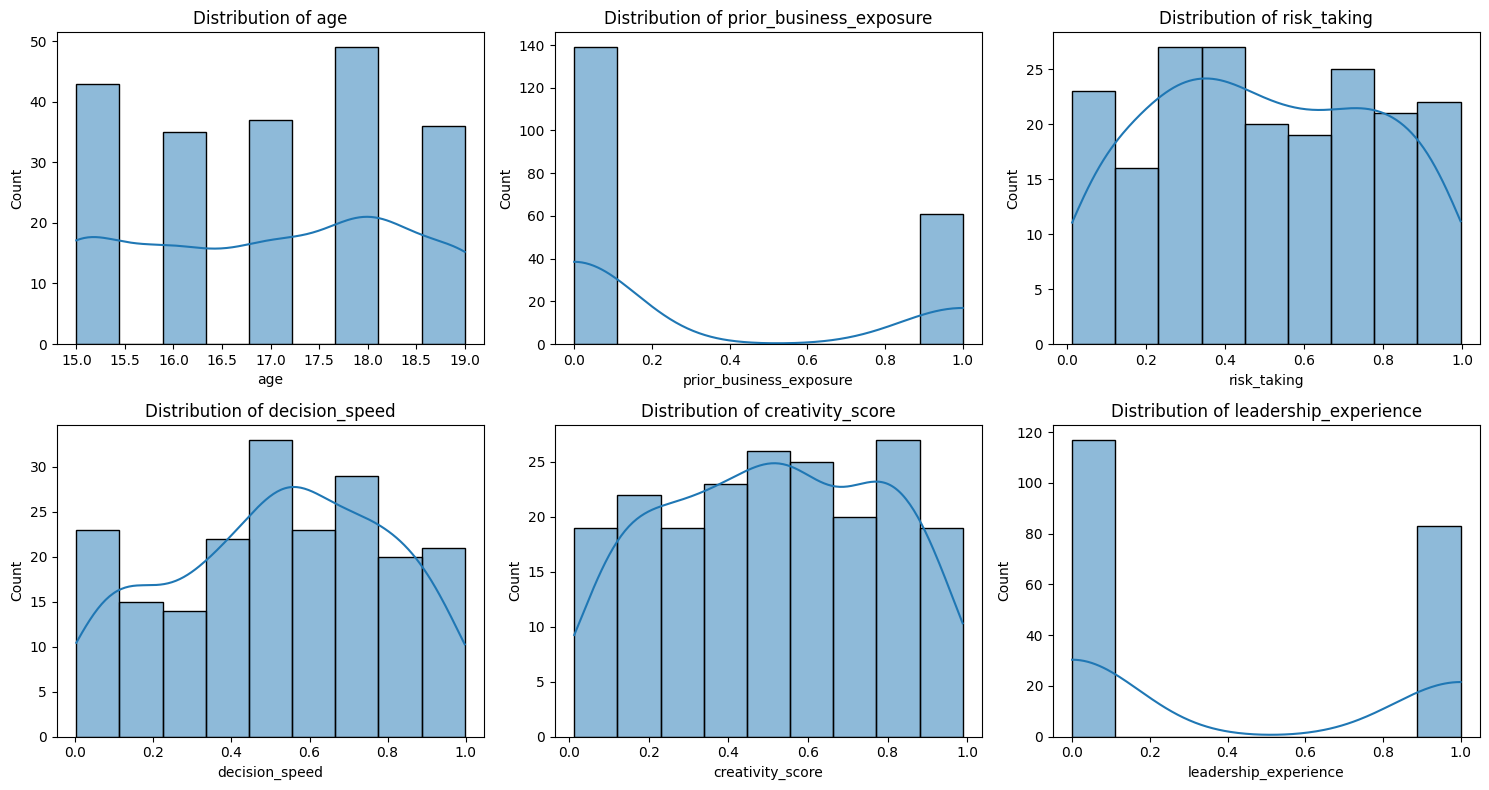

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
features = ['age', 'prior_business_exposure', 'risk_taking', 'decision_speed', 'creativity_score', 'leadership_experience']
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


**Correlation Heatmap**: A heatmap helps us see which features are correlated with each other and with the target.

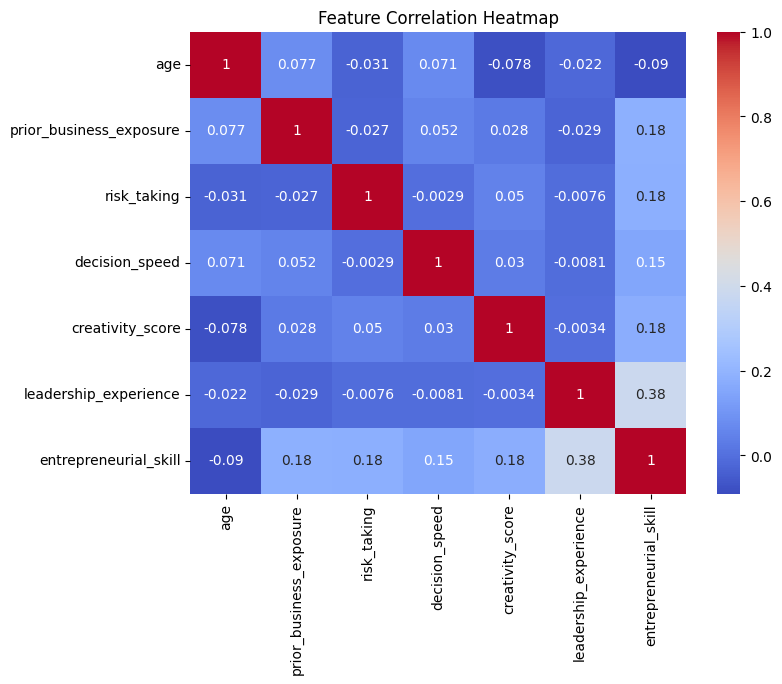

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


**Feature Engineering & Model Preparation**
Clean the data, scale features, and split into training and test sets.

**Data Cleaning and Scaling**
Scale the continuous features.

In [6]:
X = data.drop('entrepreneurial_skill', axis=1)
y = data['entrepreneurial_skill']

# Scale continuous features
scaler = StandardScaler()
X[['age', 'risk_taking', 'decision_speed', 'creativity_score']] = scaler.fit_transform(
    X[['age', 'risk_taking', 'decision_speed', 'creativity_score']]
)

X.head()


,age,prior_business_exposure,risk_taking,decision_speed,creativity_score,leadership_experience
0,0.707107,1,-1.319302,1.389907,0.719691,1
1,1.414214,0,1.094486,0.354425,0.983809,0
2,0.000000,1,1.127845,1.669930,-1.360494,1
3,1.414214,1,0.439459,0.321190,-1.133914,0
4,1.414214,0,1.127094,0.424622,0.745825,1


**Train-Test Split**: Split the data into 75% training and 25% testing.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train samples: 150, Test samples: 50


**Model Architecture**: Use a Random Forest Classifier for its interpretability and robustness. This model is suitable for small-to-medium datasets and can handle both categorical and continuous features.

**Model Instantiation and Configuration**

In [10]:
# Instantiate Random Forest with 100 trees
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)


**Training & Initial Performance Metrics** : Evaluate the model using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.

Predictions and Metrics

In [11]:
# Train the model
model.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1-score: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Confusion Matrix**

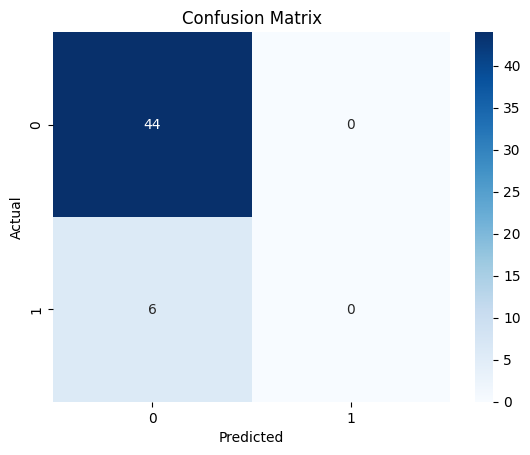

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**ROC Curve and AUC**

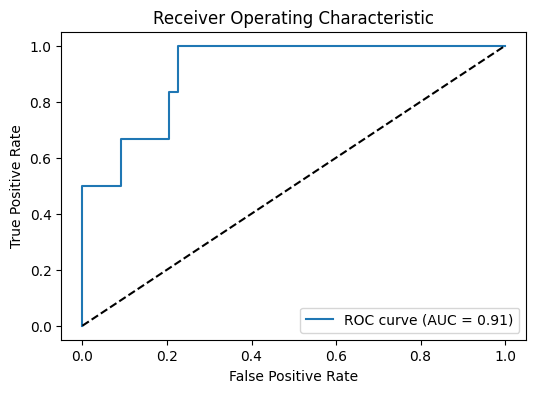

In [13]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**Export Model for Deployment** : Save trained model so it can be loaded by a web app (e.g., Streamlit) for user interaction.

In [14]:
joblib.dump(model, 'entrepreneurial_skill_model.joblib')
print("Model saved as 'entrepreneurial_skill_model.joblib'")


Model saved as 'entrepreneurial_skill_model.joblib'
